<a href="https://colab.research.google.com/github/komal2267g/Machine-Learning-LabActivity/blob/main/diabetes_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(768, 9)
pregnant    0
glucose     0
bp          0
skin        0
insulin     0
bmi         0
pedigree    0
age         0
label       0
dtype: int64
(614, 7) (614,) (154, 7) (154,)
Confusion Matrix:
 [[88 12]
 [19 35]]
Accuracy Score : 0.7987012987012987
Accuracy in Percentage: 79 %


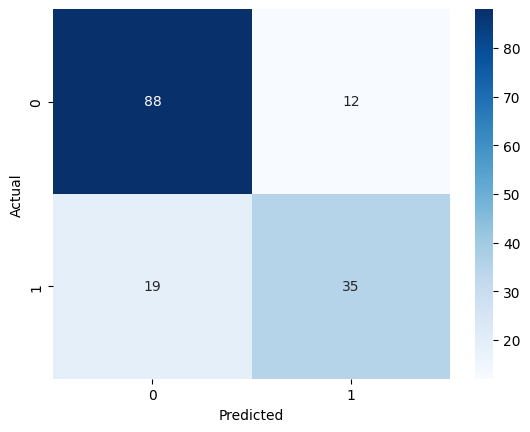

In [9]:
# 1️⃣ Import Required Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt

# 2️⃣ Load Dataset from public URL
col_names = ['pregnant','glucose','bp','skin','insulin','bmi','pedigree','age','label']
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
data = pd.read_csv(url, header=None, names=col_names)

# 3️⃣ Check Dataset
print(data.shape)
data.head()

# 4️⃣ Check for null values
print(data.isnull().sum())

# 5️⃣ Assign dependent and independent variables
feature_cols = ['pregnant','insulin','bmi','age','glucose','bp','pedigree']
X = data[feature_cols]
y = data.label

# 6️⃣ Split dataset into Training and Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

# 7️⃣ Fit Logistic Regression Model
model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)

# 8️⃣ Make Predictions
y_pred = model.predict(X_test)

# 9️⃣ Evaluation Metrics
conf_mat = metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', conf_mat)

accuracy_score = metrics.accuracy_score(y_test, y_pred)
print('Accuracy Score :', accuracy_score)
print('Accuracy in Percentage:', int(accuracy_score*100), '%')

# 10️⃣ Confusion Matrix Heatmap
conf_mat_df = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(conf_mat_df, annot=True, cmap="Blues")
plt.show()
